# House Price Prediction in King County - USA

Submitted by

**D22027-N.Maheshkumar**

**Problem Statement:** The task is to predict price for the houses present in King County, Washington, US. using the most efficient model. We have a training and testing dataset that includes details of homes sold between May 2014 and May 2015. The column description is as below: 

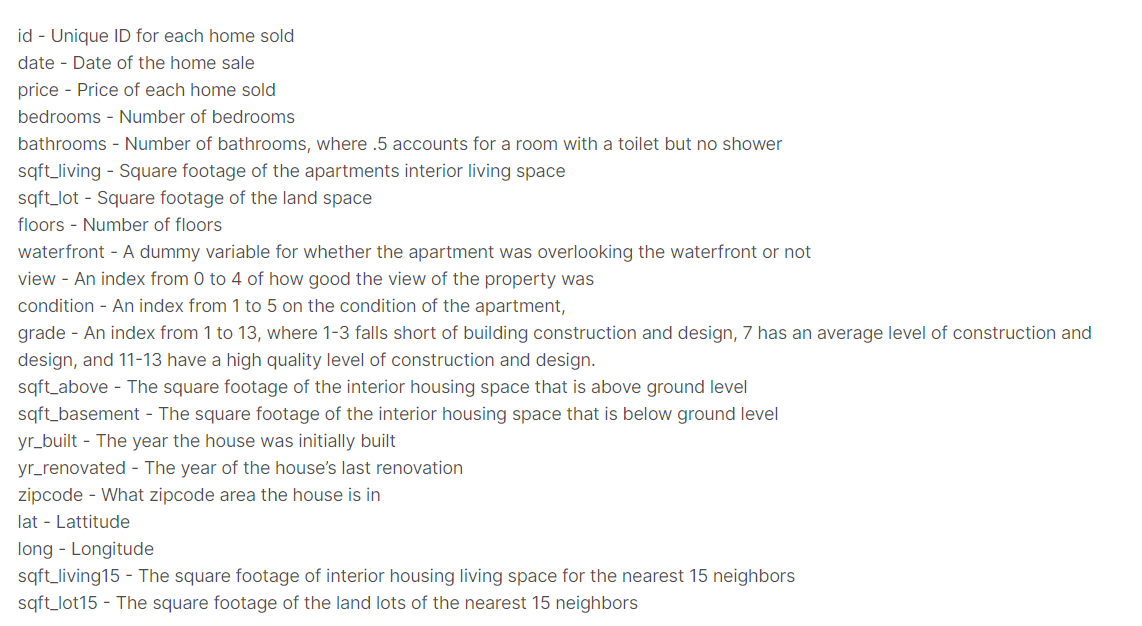

**Framing Questions/hypothesis:**

1. Will increase in No of bedrooms increase the price of House?
2. Will increase in Sqft living increase the price of house?
3. Will increase in Sqft_lot increase the price of house?
4. The presence of waterfront may decrease the price of house? 
5. Whether the presence of basement may affect the price of house?
6. whether location of house affect the price of house?
7. whether view of building positively asscoiated with price of house?
8. whether age of building is negatively associated with price of house?

In [497]:
#Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [498]:
#Load data
house = pd.read_csv("kc_house_data.csv")

In [499]:
#no of rows and columns
house.shape

(21613, 21)

In [500]:
#Checking the datatypes
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [501]:
#Finding No of null values in each column
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [502]:
house.loc[house.sqft_above.isnull()]  #to find the rows which are having Null Values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [503]:
house = house.drop([10,17])   #Dropping the rows with Null Values(Better fill with Mean,Median,Mode)

In [504]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.401791e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.673781e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Univariate Analysis

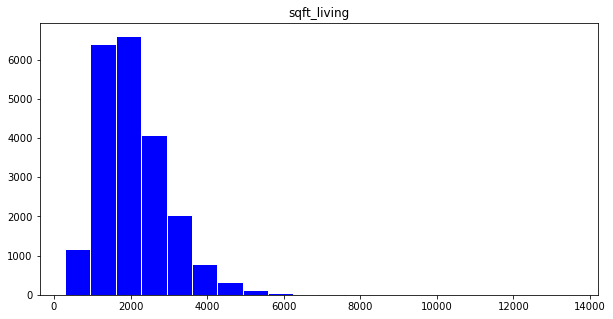

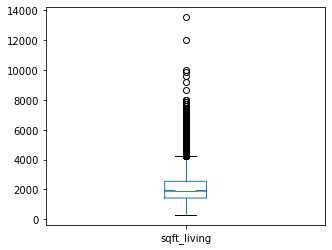

In [505]:
#histogram
house.hist(column ="sqft_living",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="blue",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="sqft_living",
            grid= False,
            figsize=(5,4),
            notch=True)

plt.show()


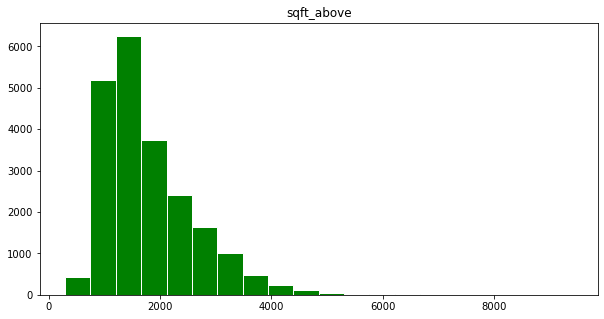

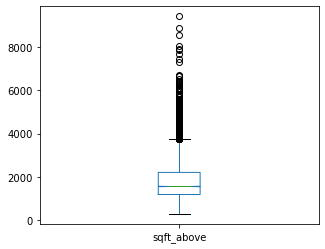

In [506]:
#histogram
house.hist(column ="sqft_above",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="green",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="sqft_above",
            grid= False,
            figsize=(5,4),
            notch=True)

plt.show()

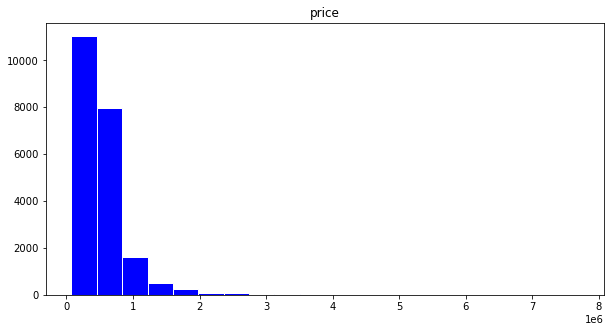

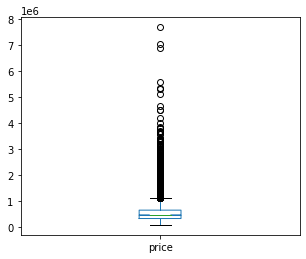

In [507]:
#histogram
house.hist(column ="price",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="blue",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="price",
            grid= False,
            figsize=(5,4),
            notch=True)

plt.show()

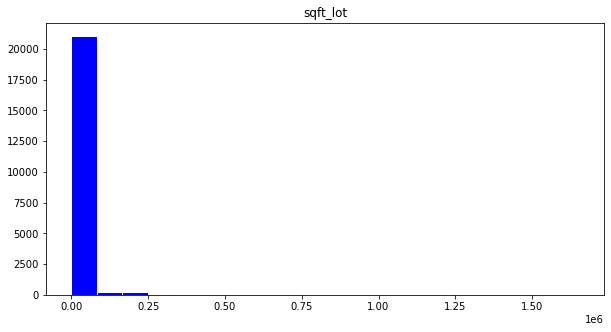

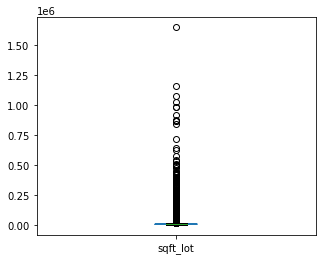

In [508]:
#histogram
house.hist(column ="sqft_lot",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="blue",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="sqft_lot",
            grid= False,
            figsize=(5,4),
            notch=True)

plt.show()

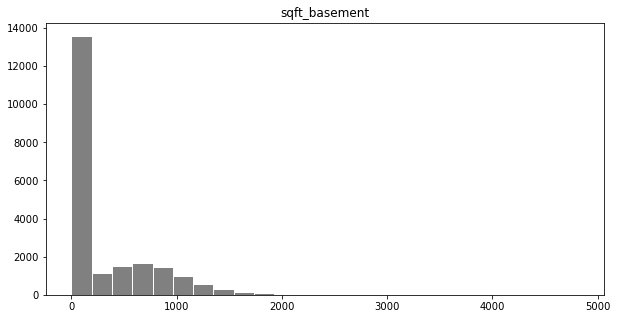

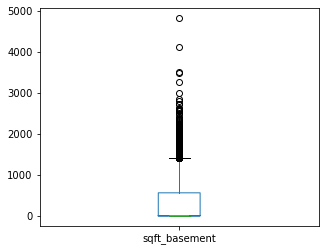

In [509]:
#histogram
house.hist(column ="sqft_basement",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="grey",
         edgecolor="White",
         bins=25)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="sqft_basement",
            grid= False,
            figsize=(5,4),
            notch=True)
plt.show()

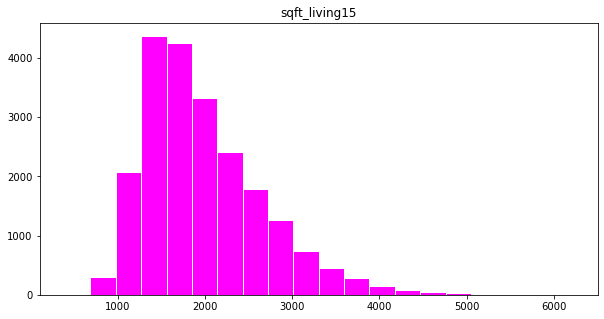

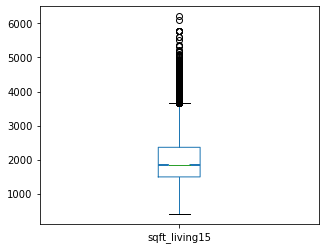

In [510]:
#Histogram
house.hist(column ="sqft_living15",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="magenta",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="sqft_living15",
            grid= False,
            figsize=(5,4),
            notch=True)
plt.show()

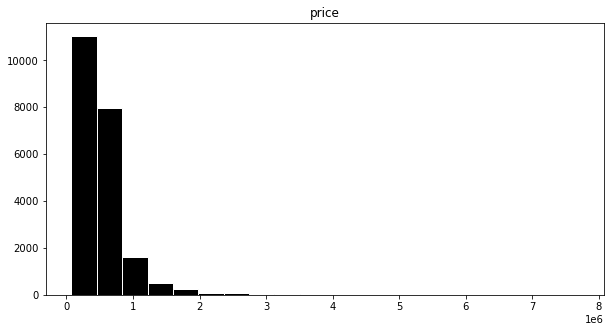

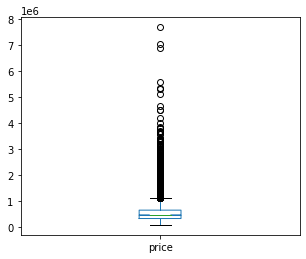

In [511]:
house.hist(column ="price",
        
          grid=False,        #Do not include the grid
          figsize=(10,5),
         color="Black",
         edgecolor="White",
         bins=20)     #(Length,Height) of the plot in inches

plt.show()

#boxplot
house.boxplot(column="price",
            grid= False,
            figsize=(5,4),
            notch=True)
plt.show()

**Categorical**

In [512]:
# Frequency Distribution
table = pd.crosstab(house.bedrooms,columns="bedrooms")
table

col_0,bedrooms
bedrooms,
0,13
1,199
2,2760
3,9823
4,6881
5,1601
6,272
7,38
8,13


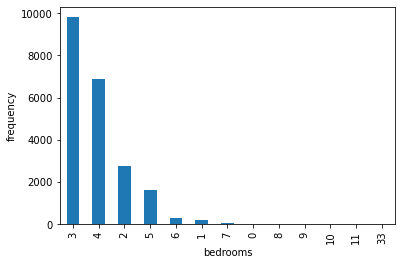

In [513]:
#bar_plot
house['bedrooms'].value_counts().plot( kind='bar', xlabel='bedrooms', ylabel='frequency')

plt.show()

In [514]:
# Frequency Distribution
table = pd.crosstab(house.bathrooms,columns="bathrooms")
table


col_0,bathrooms
bathrooms,
0.00,10
0.50,4
0.75,72
1.00,3851
1.25,9
1.50,1446
1.75,3048
2.00,1930
2.25,2047


In [515]:
# Frequency Distribution
table = pd.crosstab(house.floors,columns="floors")
table

col_0,floors
floors,
1.0,10679
1.5,1909
2.0,8241
2.5,161
3.0,613
3.5,8


In [516]:
# Frequency Distribution
table = pd.crosstab(house.waterfront,columns="waterfront")
table

col_0,waterfront
waterfront,
0,21448
1,163


In [517]:
# Frequency Distribution
table = pd.crosstab(house.view,columns="view")
table

col_0,view
view,
0,19487
1,332
2,963
3,510
4,319


In [518]:
# Frequency Distribution
table = pd.crosstab(house.grade,columns="grade")
table

col_0,grade
grade,
1,1
3,3
4,29
5,242
6,2038
7,8980
8,6067
9,2615
10,1134


In [519]:
# Frequency Distribution
table = pd.crosstab(house.condition,columns="condition")
table

col_0,condition
condition,
1,30
2,172
3,14030
4,5678
5,1701


In [520]:
# Frequency Distribution
table = pd.crosstab(house.yr_built,columns="yr_built")
table

col_0,yr_built
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [521]:
# Frequency Distribution
table = pd.crosstab(house.yr_renovated,columns="yr_renovated")
table

col_0,yr_renovated
yr_renovated,
0,20697
1934,1
1940,2
1944,1
1945,3
...,...
2011,13
2012,11
2013,37


# Bi-Variate Analysis

In [522]:
#Correlation between continous numerical variables
df_continous = house[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
corr = df_continous.corr()
corr.style.background_gradient()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.702064,0.089656,0.605565,0.323864,0.585372,0.082456
sqft_living,0.702064,1.000000,0.172841,0.876644,0.434925,0.756440,0.183301
sqft_lot,0.089656,0.172841,1.000000,0.183511,0.015301,0.144605,0.718556
sqft_above,0.605565,0.876644,0.183511,1.000000,-0.051976,0.731871,0.194048
sqft_basement,0.323864,0.434925,0.015301,-0.051976,1.000000,0.200341,0.017292
sqft_living15,0.585372,0.756440,0.144605,0.731871,0.200341,1.000000,0.183188
sqft_lot15,0.082456,0.183301,0.718556,0.194048,0.017292,0.183188,1.000000


# Report:


From the above correlation matrix and we compare each continous numerical value with target variable price

1.It is found that Sqft_living,Sqft_above,Sqft_living15 having correlation coeff more than 0.50 . Sqft_living,Sqft_above are highly correlated with price and sqft_basement is moderately correlated.



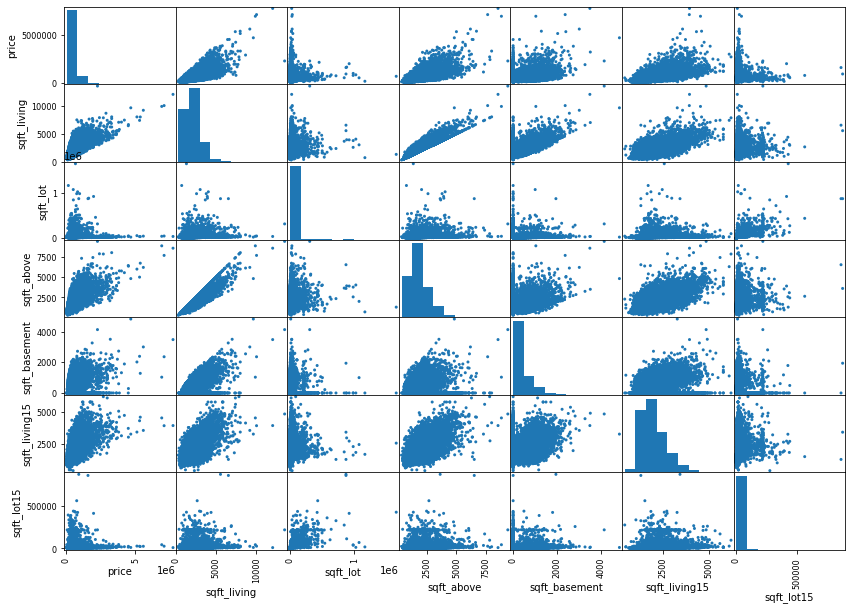

In [523]:
#Scatter Plot for Continous Numerical Values
from pandas.plotting import scatter_matrix
scatter_matrix(house.drop(["id","date","bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"],axis=1),alpha=1,   # drop will drop specified column car, model,Origin
               figsize=(14,10),                                      # alpha = 1 is if datapoints are same it will increase the 
               diagonal='hist')                                      # dot intensity
plt.show()

scatter plot of price vs  price


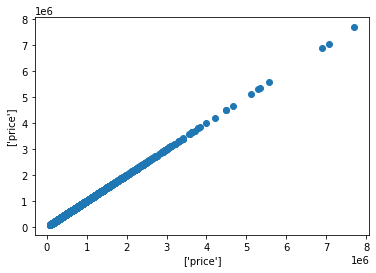

scatter plot of price vs  sqft_living


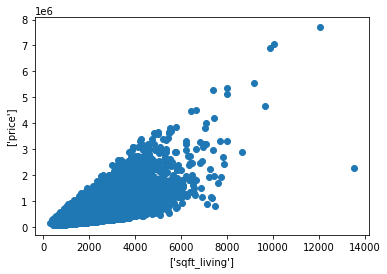

scatter plot of price vs  sqft_lot


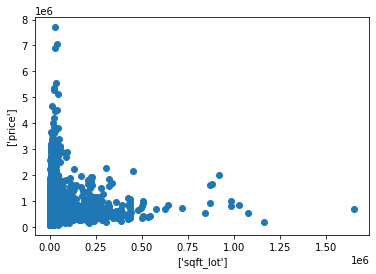

scatter plot of price vs  sqft_above


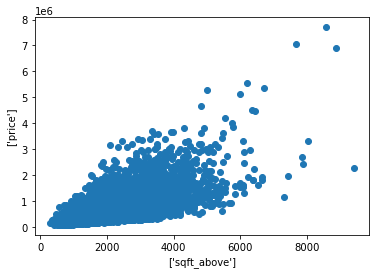

scatter plot of price vs  sqft_basement


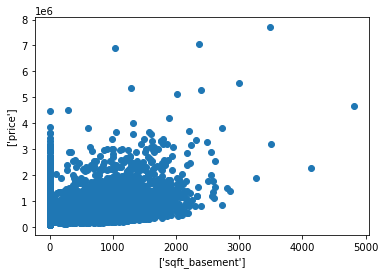

scatter plot of price vs  sqft_living15


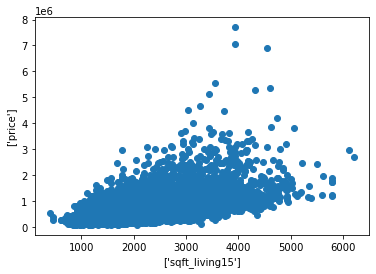

scatter plot of price vs  sqft_lot15


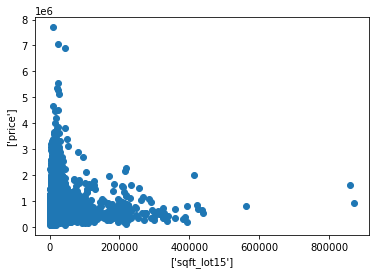

In [524]:
for i in df_continous:
    print("scatter plot of price vs ",i)
    plt.scatter(df_continous[[i]],df_continous.price)
    plt.xlabel([i])
    plt.ylabel(["price"])
    plt.show()

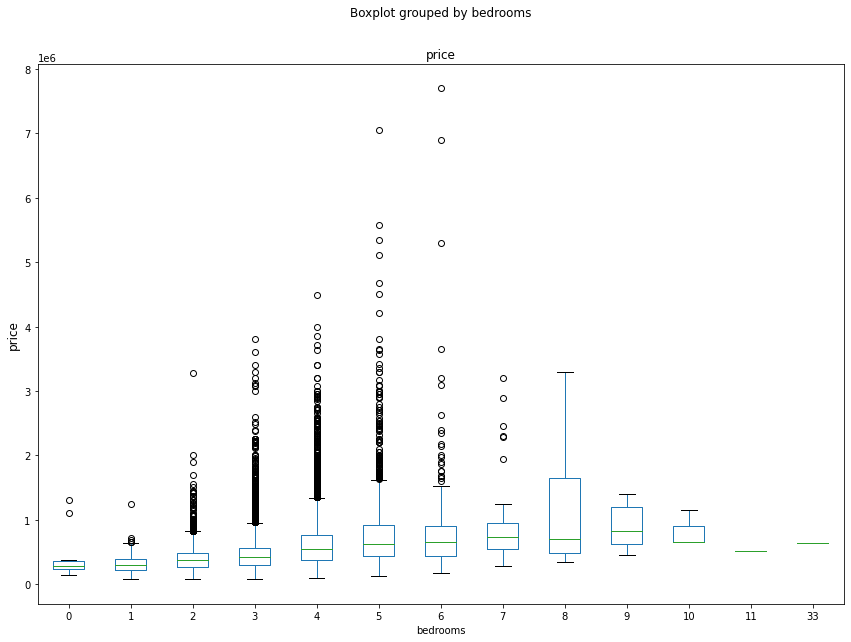

In [525]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="bedrooms",
             figsize=(14,10),notch=False)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

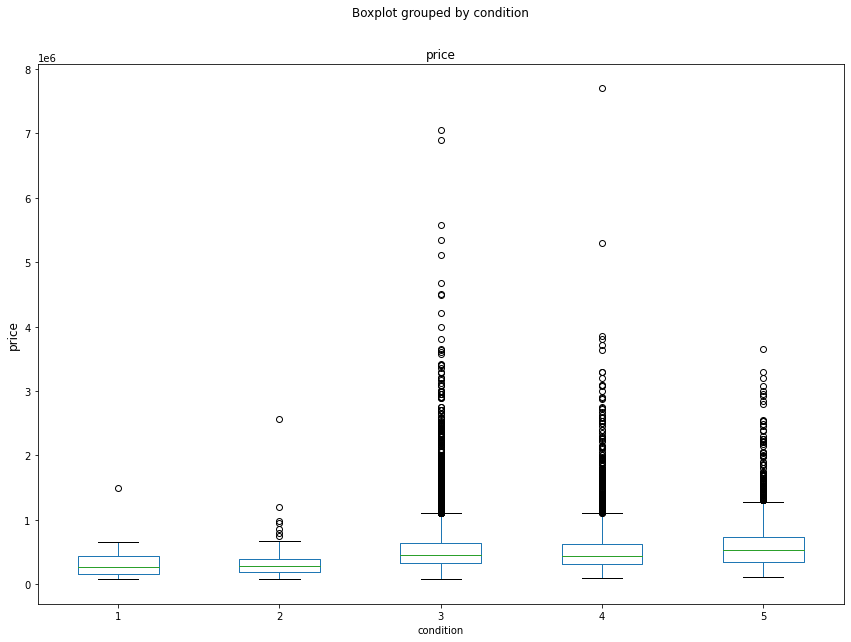

In [526]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="condition",
             figsize=(14,10),notch=False)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

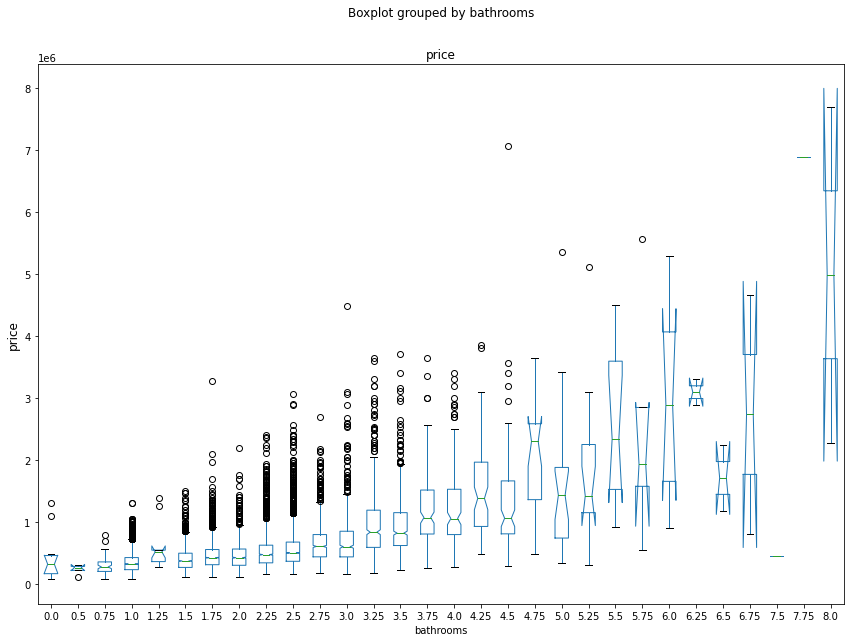

In [527]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="bathrooms",
             figsize=(14,10),notch=True)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

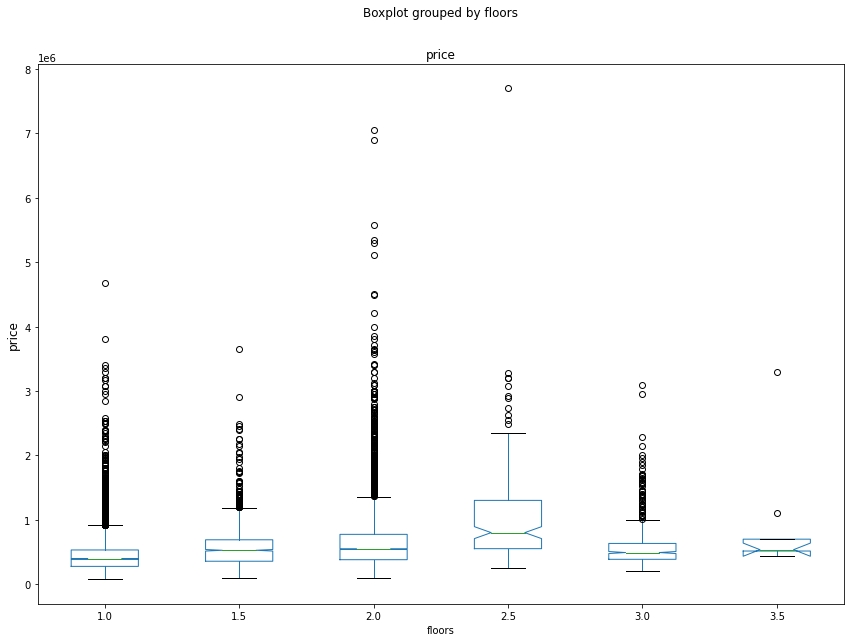

In [528]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="floors",
             figsize=(14,10),notch=True)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

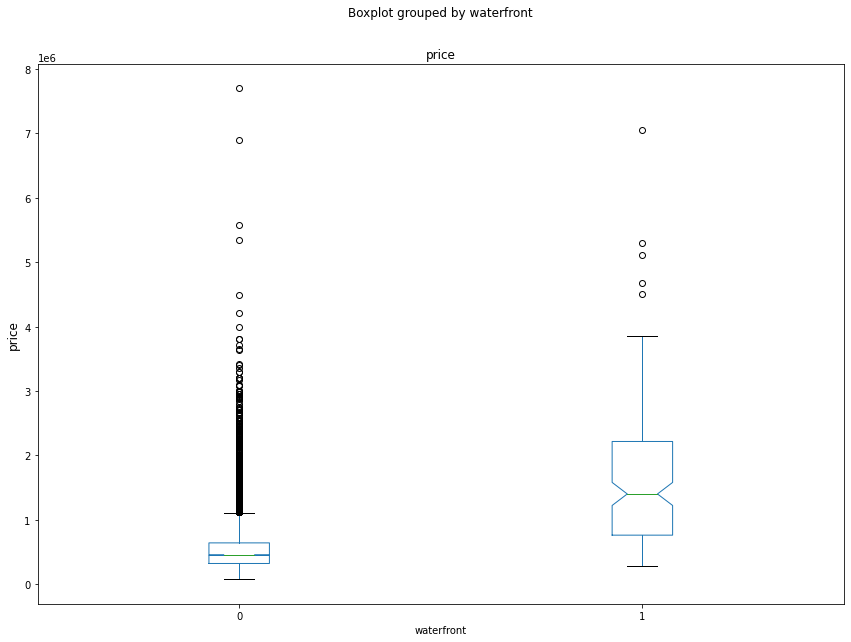

In [529]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="waterfront",
             figsize=(14,10),notch=True)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

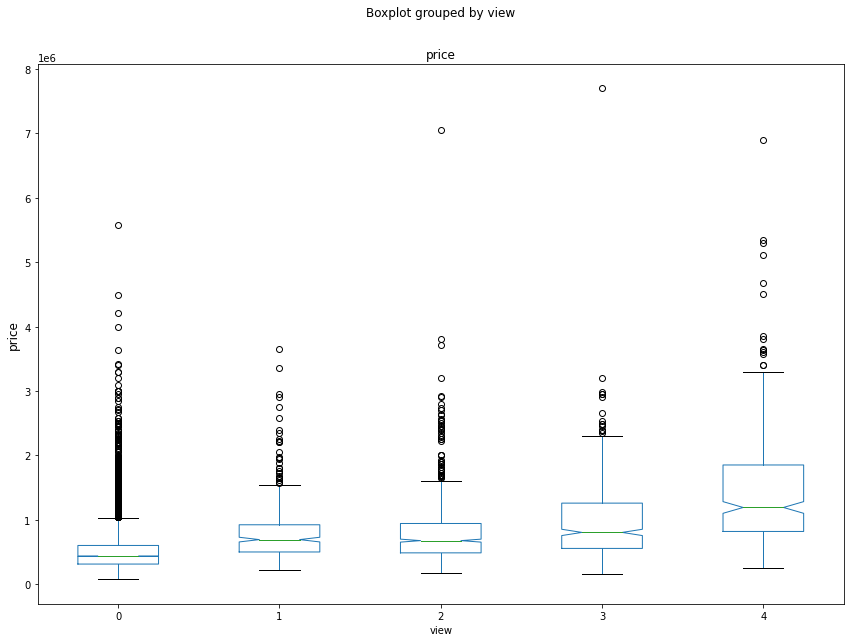

In [530]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="view",
             figsize=(14,10),notch=True)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

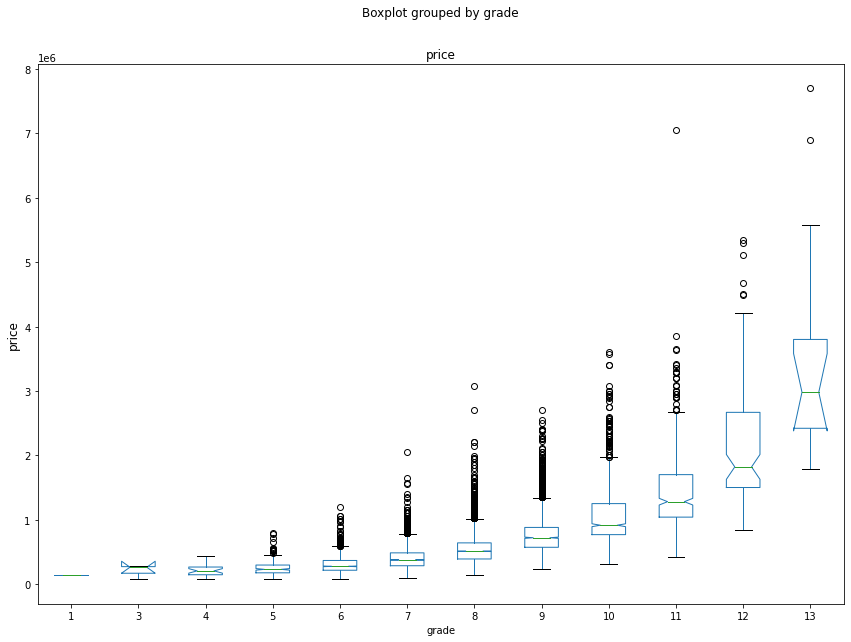

In [531]:
#df_discrete= house[["bedrooms","condition","bathrooms","floors","waterfront","view","grade","yr_built","yr_renovated","zipcode","lat","long"]]

#Side by Side boxplot
house.boxplot(column="price",
             grid=False,
             by="grade",
             figsize=(14,10),notch=True)

plt.ylabel("price", fontsize=12)
#plt.title("Boxplot of Weight",fontsize=14)

plt.show()

# Predictors and Target

In [532]:
X = house.drop(["price"],axis=1)  #predictors, dropping house column (Target) to drop column axis=1
y = house.price
X.head(1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650


# Train-Validation-Test Split

In [533]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

In [534]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18370,2781250230,20140605T000000,4,2.50,2070,4500,2.0,0,0,3,7,2070.0,0,2004,0,98038,47.3497,-122.026,2760,5173
6180,1266200130,20140615T000000,3,1.75,2140,9484,1.0,0,0,3,7,1290.0,850,1953,0,98004,47.6234,-122.191,1960,9630
19847,9211010260,20140617T000000,4,2.50,3250,4500,2.0,0,0,3,8,3250.0,0,2009,0,98059,47.4944,-122.149,3030,4518
3232,9269260100,20141216T000000,4,2.25,2680,4673,2.0,0,0,3,7,2680.0,0,1999,0,98011,47.7539,-122.219,2460,4645
12909,3755200220,20140718T000000,4,2.00,1650,9305,1.0,0,0,4,6,1650.0,0,1960,0,98034,47.7183,-122.213,1860,7486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,2862100260,20141003T000000,4,1.75,1840,4280,1.0,0,0,4,7,920.0,920,1918,0,98105,47.6681,-122.320,1660,4280
17731,9527000090,20150318T000000,3,2.25,1890,8400,1.0,0,0,3,8,1520.0,370,1977,0,98034,47.7103,-122.232,1830,7980
20326,1725059127,20150225T000000,6,4.25,5550,11547,2.0,0,2,3,11,4270.0,1280,2014,0,98033,47.6547,-122.202,3480,11547
625,7812800565,20140814T000000,3,1.00,960,6400,1.0,0,0,4,6,820.0,140,1944,0,98178,47.4960,-122.239,1200,6600


# Initial model fitting step

### Fitting a Linear Regression Model

Now we construct a linear regression model and keeping above mentioned columns as predictors and target as price. we added columns which high correlation and then ran the linear regression and so on.  we compare the R-squared and Adj. R-squared values.

**MODEL1: BaseLine Model**

In [535]:
import statsmodels.api as sm

X_train1 = X_train[['sqft_living','grade','sqft_living15','bathrooms','sqft_above','floors','bedrooms','condition','sqft_basement','sqft_lot','sqft_lot15','waterfront','view']] 


X_valid1 = X_valid[['sqft_living','grade','sqft_living15','bathrooms','sqft_above','floors','bedrooms','condition','sqft_basement','sqft_lot','sqft_lot15','waterfront','view']] 


# x = sm.add_constant(X_train)              #An intercept is not included by default and should be added by the user otherwise R_square will be negative
# model = sm.OLS(y_train,x).fit()           #fitting linear regression
# model.summary()

In [536]:
from sklearn.linear_model import LinearRegression  #Fitting Linear Regression Model to Train data
lr= LinearRegression()

model=lr.fit(X_train1,y_train)

pred_train = model.predict(X_train1)   #predictions on transformed training data
#pred_train

pred_valid = model.predict(X_valid1)   #predictions on transformed validation data
#pred_valid


from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error((y_valid),(pred_valid)) #Finding the mape error in percentage
mse = mean_squared_error((y_valid),(pred_valid))              
mae = mean_absolute_error((y_valid),(pred_valid))

mape1 = mean_absolute_percentage_error((y_train),(pred_train)) #Finding the mape error in percentage
mse1 = mean_squared_error((y_train),(pred_train))
mae1 = mean_absolute_error((y_train),(pred_train))

print('R^2 :',lr.score(X_train1,y_train))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

R^2 : 0.6068908876775887
MAPE_train : 0.3149858964054129
MAE_train : 151280.34500505053


MAPE_valid : 0.32105325790695854
MAE_valid : 153395.21861817144


**Checking for Multi-Collinearity through VIF**

In [537]:
import warnings
warnings.filterwarnings("ignore")

In [538]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train1.values, i)
                          for i in range(len(X_train1.columns))]
  
print(vif_data)

          feature        VIF
0     sqft_living        inf
1           grade  68.265069
2   sqft_living15  26.340978
3       bathrooms  24.981124
4      sqft_above        inf
5          floors  15.835016
6        bedrooms  19.847462
7       condition  21.112458
8   sqft_basement        inf
9        sqft_lot   2.330969
10     sqft_lot15   2.565955
11     waterfront   1.177599
12           view   1.467658


Dropping Sqft_above and Sqft_basement becoz of very high VIF Value

## Feature Engineering

In [539]:
import warnings
warnings.filterwarnings("ignore")

**MODEL2: Log Transformation**

In [540]:
from sklearn.linear_model import LinearRegression  #Fitting Linear Regression Model to Train data
lr= LinearRegression()

X_train2 = X_train[['grade','bathrooms','floors','bedrooms','condition','waterfront','view']]
log_transform = ['sqft_living','sqft_living15','sqft_lot']

X_valid2 = X_valid[['grade','bathrooms','floors','bedrooms','condition','waterfront','view']]

In [541]:
for variable in log_transform:
    X_train2['log '+variable]= np.log(X_train[variable])

y_train2 = np.log(y_train)

In [542]:
for variable in log_transform:
    X_valid2['log '+variable]= np.log(X_valid[variable])

y_valid2 = np.log(y_valid)

In [543]:
model=lr.fit(X_train2,y_train2)

pred_train = model.predict(X_train2)   #predictions on transformed training data
#pred_train

pred_valid = model.predict(X_valid2)   #predictions on transformed validation data
#pred_valid


from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error(np.exp(y_valid2),np.exp(pred_valid)) #Finding the mape error in percentage
mse = mean_squared_error(np.exp(y_valid2),np.exp(pred_valid))              #take anti-log
mae = mean_absolute_error(np.exp(y_valid2),np.exp(pred_valid))

mape1 = mean_absolute_percentage_error(np.exp(y_train2),np.exp(pred_train)) #Finding the mape error in percentage
mse1 = mean_squared_error(np.exp(y_train2),np.exp(pred_train))
mae1 = mean_absolute_error(np.exp(y_train2),np.exp(pred_train))

print('R^2 :',lr.score(X_train2,y_train2))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

R^2 : 0.5996189431010728
MAPE_train : 0.2751007088989249
MAE_train : 139346.26117659733


MAPE_valid : 0.2779837982005274
MAE_valid : 141233.98124575047


**MODEL 3: X^2 transformation**

In [544]:
from sklearn.linear_model import LinearRegression  #Fitting Linear Regression Model to Train data
lr= LinearRegression()

X_train3 = X_train[['grade','bathrooms','floors','bedrooms','condition','waterfront','view']]
sq_transform = ['sqft_living','sqft_living15','sqft_lot']

X_valid3 = X_valid[['grade','bathrooms','floors','bedrooms','condition','waterfront','view']]

In [545]:
for variable in sq_transform:
    X_train3['Sq:'+variable]= (X_train[variable])**2

In [546]:
for variable in sq_transform:
    X_valid3['Sq:'+variable]= (X_valid[variable])**2

In [547]:
model=lr.fit(X_train3,y_train)

pred_train = model.predict(X_train3)   #predictions on transformed training data
#pred_train

pred_valid = model.predict(X_valid3)   #predictions on transformed validation data
#pred_valid

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error(y_valid,pred_valid) #Finding the mape error in percentage
mse = mean_squared_error(y_valid,pred_valid)              
mae = mean_absolute_error(y_valid,pred_valid)

mape1 = mean_absolute_percentage_error(y_train,pred_train) #Finding the mape error in percentage
mse1 = mean_squared_error(y_train,pred_train)
mae1 = mean_absolute_error(y_train,pred_train)

print('R^2 :',lr.score(X_train3,y_train))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

R^2 : 0.6527411917206241
MAPE_train : 0.29963409027901444
MAE_train : 145126.79559744455


MAPE_valid : 0.3055450265731452
MAE_valid : 147500.91248353987


**MODEL 4: Adding 'Age' as New feature**

In [548]:
#Creating a New Feature-Age by deducting Year built by current date
X_train4 = X_train2
X_valid4 = X_valid2
y_train4 = np.log(y_train)
y_valid4 = np.log(y_valid)

X_train4['Age'] = 2015-X_train['yr_built']
X_valid4['Age'] = 2015-X_valid['yr_built']
X_valid4.head()

,grade,bathrooms,floors,bedrooms,condition,waterfront,view,log sqft_living,log sqft_living15,log sqft_lot,Age
2238,7,1.00,1.0,2,3,0,0,6.733402,7.371489,8.534444,90
15678,7,1.75,1.0,3,3,0,0,7.319865,7.326466,9.181941,67
14889,7,1.75,1.0,5,4,0,0,7.455877,7.207860,8.556414,37
16401,7,1.50,1.5,3,3,0,0,7.414573,7.402452,8.699515,78
18281,10,2.50,1.0,3,5,0,0,8.107720,8.224164,9.382191,36


In [549]:
model=lr.fit(X_train4,y_train4)

pred_train = model.predict(X_train4)   #predictions on transformed training data
#pred_train

pred_valid = model.predict(X_valid4)   #predictions on transformed validation data
#pred_valid

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error(np.exp(y_valid4),np.exp(pred_valid)) #Finding the mape error in percentage
mse = mean_squared_error(np.exp(y_valid4),np.exp(pred_valid))              #take anti-log
mae = mean_absolute_error(np.exp(y_valid4),np.exp(pred_valid))

mape1 = mean_absolute_percentage_error(np.exp(y_train4),np.exp(pred_train)) #Finding the mape error in percentage
mse1 = mean_squared_error(np.exp(y_train4),np.exp(pred_train))
mae1 = mean_absolute_error(np.exp(y_train4),np.exp(pred_train))

print('R^2 :',lr.score(X_train4,y_train4))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

R^2 : 0.660555169402002
MAPE_train : 0.2519418970847693
MAE_train : 126947.94259536699


MAPE_valid : 0.2551104659945904
MAE_valid : 130549.94916918983


**MODEL 5: Adding Sqft_basement and converting into Categorical Variable by Assigning 0 for Absence of basement and 1 for Presence of Basement**

In [550]:
X_train5 = X_train4
X_valid5 = X_valid4
y_train5 = np.log(y_train)
y_valid5 = np.log(y_valid)

X_trainB = X_train.copy() 
X_validB = X_valid.copy()

In [551]:
X_trainB[X_trainB['sqft_basement'] == 0] = 0
X_trainB[X_trainB['sqft_basement'] > 0] = 1 

X_validB[X_validB['sqft_basement'] == 0] = 0
X_validB[X_validB['sqft_basement'] > 0] = 1 

In [552]:
f = [X_train5,X_trainB['sqft_basement']] 
X_train5 = pd.concat(f,axis=1,join='inner')

f = [X_valid5,X_validB['sqft_basement']] 
X_valid5 = pd.concat(f,axis=1,join='inner') 

In [553]:
model1=lr.fit(X_train5,y_train5)        # model fitting after transformation

pred_train5 = model1.predict(X_train5)   #predictions on transformed training data
#pred_train

pred_valid5 = model1.predict(X_valid5)   #predictions on transformed validation data
#pred_valid

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error(np.exp(y_valid5),np.exp(pred_valid)) #Finding the mape error in percentage
mse = mean_squared_error(np.exp(y_valid5),np.exp(pred_valid))              #take anti-log
mae = mean_absolute_error(np.exp(y_valid5),np.exp(pred_valid))

mape1 = mean_absolute_percentage_error(np.exp(y_train5),np.exp(pred_train)) #Finding the mape error in percentage
mse1 = mean_squared_error(np.exp(y_train5),np.exp(pred_train))
mae1 = mean_absolute_error(np.exp(y_train5),np.exp(pred_train))

print('R^2 :',lr.score(X_train5,y_train5))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

R^2 : 0.6625024398199573
MAPE_train : 0.2519418970847693
MAE_train : 126947.94259536699


MAPE_valid : 0.2551104659945904
MAE_valid : 130549.94916918983


**MODEL 6: Log Transformation with Zipcode as Dummy Variable**

With one-hot encoding, we convert each categorical columns into a new one by assigning a dummy variable or value(0 or 1) to those columns

In [557]:
temp1 = pd.get_dummies(X_train['zipcode'],prefix=['zipcode']) 
temp1.head(1) #displaying temp1 as single column zipcode as been divided into 70 columns

temp2 = pd.get_dummies(X_valid['zipcode'],prefix=['zipcode']) 
temp2.head(1) #displaying temp2 as single column zipcode as been divided into 70 columns

,['zipcode']_98001,['zipcode']_98002,['zipcode']_98003,['zipcode']_98004,['zipcode']_98005,['zipcode']_98006,['zipcode']_98007,['zipcode']_98008,['zipcode']_98010,['zipcode']_98011,...,['zipcode']_98146,['zipcode']_98148,['zipcode']_98155,['zipcode']_98166,['zipcode']_98168,['zipcode']_98177,['zipcode']_98178,['zipcode']_98188,['zipcode']_98198,['zipcode']_98199
2238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [558]:
f = [X_train5,temp1] 
X_train7 = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y_train7 = np.log(y_train)
print('Linear Regression model with feature engineering of one-hot encoding the categorical variables')

f = [X_valid5,temp2] 
X_valid7 = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y_valid7=np.log(y_valid)

model=lr.fit(X_train7,y_train7)        # model fitting after transformation

pred_train = model.predict(X_train7)   #predictions on transformed training data
#pred_train

pred_valid = model.predict(X_valid7)   #predictions on transformed validation data
#pred_valid

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

mape = mean_absolute_percentage_error(np.exp(y_valid7),np.exp(pred_valid)) #Finding the mape error in percentage
mse = mean_squared_error(np.exp(y_valid7),np.exp(pred_valid))              #take anti-log
mae = mean_absolute_error(np.exp(y_valid7),np.exp(pred_valid))

mape1 = mean_absolute_percentage_error(np.exp(y_train7),np.exp(pred_train)) #Finding the mape error in percentage
mse1 = mean_squared_error(np.exp(y_train7),np.exp(pred_train))
mae1 = mean_absolute_error(np.exp(y_train7),np.exp(pred_train))

print('R^2 :',lr.score(X_train7,y_train7))
print("MAPE_train :",mape1)
# print("MSE_valid :",mse)
print("MAE_train :",mae1)
print("\n")
print("MAPE_valid :",mape)
# print("MSE_valid :",mse)
print("MAE_valid :",mae)

Linear Regression model with feature engineering of one-hot encoding the categorical variables
R^2 : 0.881190849344264
MAPE_train : 0.13595287930436628
MAE_train : 73347.80422437201


MAPE_valid : 0.13444463066440962
MAE_valid : 73287.33665483496


**Conclusion:** The Final Model (Model No.6) is performing well when compared to all other models with **R^2- 0.88 and Mape - 13.44% and MAE- 73287 **. It is found that,the log feature transformation and one-hot encoding of Zipcode better explains the variation in Target Variable(Price)

__Thank you__